In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 121.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=742a794dd2cb8a040a670f861b56c4111d8aaf98d2964ac3ace070ca2ffc6724
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [ ]:
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import json
kaggle_username = "tusharbhardwa"
kaggle_key = "c674feda446c2330f143f1507021a674"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 44.4MB/s]


In [ ]:
!unzip -o bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor
import matplotlib.pyplot as plt
import autogluon as ag

In [ ]:
train=pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
predictor = TabularPredictor(
   learner_kwargs={"ignored_columns": ["casual", "registered"]}, label="count", problem_type="regression", eval_metric="r2"
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230610_165543/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230610_165543/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12140.45 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.914989      19.190571  485.486332                0.000929           0.279195            3       True         13
1   RandomForestMSE_BAG_L2   0.912779      18.186770  428.597968                0.646500          48.485338            2       True         11
2     ExtraTreesMSE_BAG_L2   0.912146      18.185797  397.358227                0.645528          17.245597            2       True         12
3          LightGBM_BAG_L2   0.907619      17.897614  419.476201                0.357344          39.363571            2       True         10
4        LightGBMXT_BAG_L2   0.888360      22.064847  467.817713                4.524578          87.705083            2       True          9
5    KNeighborsDist_BAG_L1   0.784305       0.046964    0.048711                

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.4732562269834053,
  'LightGBM_BAG_L1': 0.476531925532341,
  'RandomForestMSE_BAG_L1': 0.5859982828970275,
  'CatBoost_BAG_L1': 0.47712276958959743,
  'ExtraTreesMSE

In [ ]:
y_pred=predictor.predict(test)
y_pred_1=np.ceil(y_pred).astype(int)
y_pred_1

0        24
1        42
2        45
3        48
4        51
       ... 
6488    159
6489    159
6490    155
6491    150
6492    149
Name: count, Length: 6493, dtype: int64

In [ ]:
submission =pd.concat([test['datetime'],y_pred_1],axis=1)

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
submission_file_path = '/content/submission.csv'

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tusharbhardwa","key":"c674feda446c2330f143f1507021a674"}'}

In [ ]:
!kaggle competitions submit -c Bike-Sharing-Demand -f /content/submission.csv -m test_submission_1

100% 148k/148k [00:03<00:00, 41.9kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description        status    publicScore  privateScore  
--------------  -------------------  -----------------  --------  -----------  ------------  
submission.csv  2023-06-10 17:08:06  test_submission_1  complete  1.79853      1.79853       
submission.csv  2023-06-10 13:25:49  test_submission_1  complete  1.78043      1.78043       
submission.csv  2023-06-10 12:46:14  test_submission_1  complete  0.64989      0.64989       
submission.csv  2023-06-10 11:54:40  test_submission_1  complete  1.78043      1.78043       


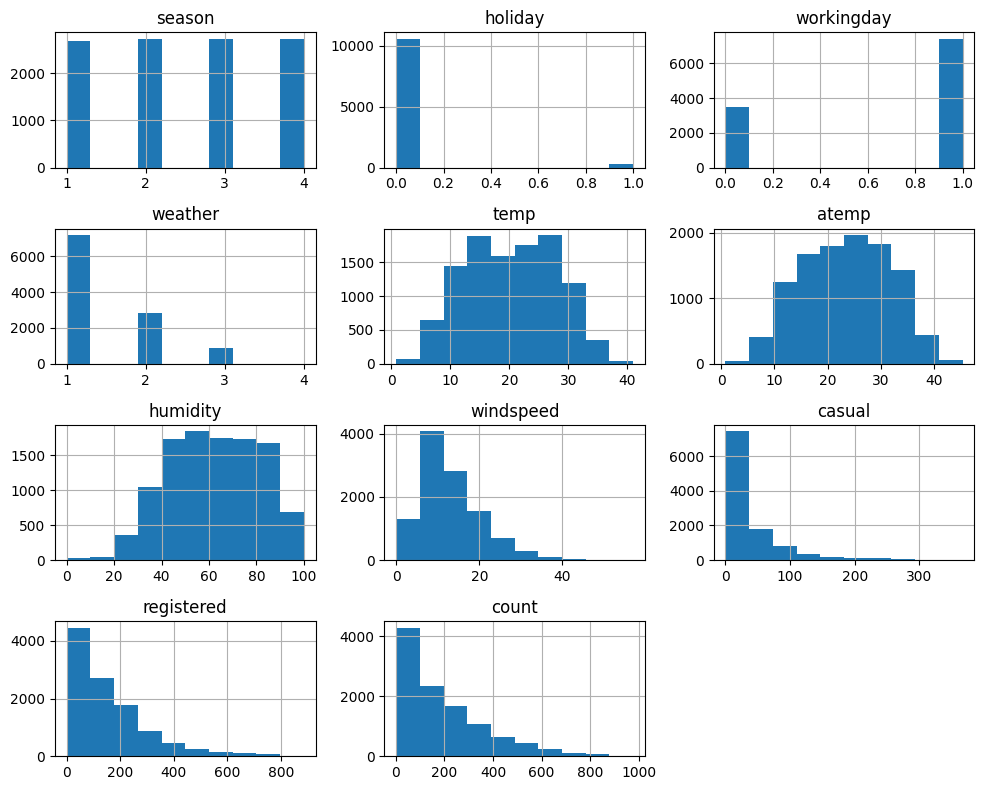

In [ ]:
train.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
train['hour_of_day'] = pd.to_datetime(train['datetime']).dt.hour
test['hour_of_day'] = pd.to_datetime(test['datetime']).dt.hour

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [ ]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


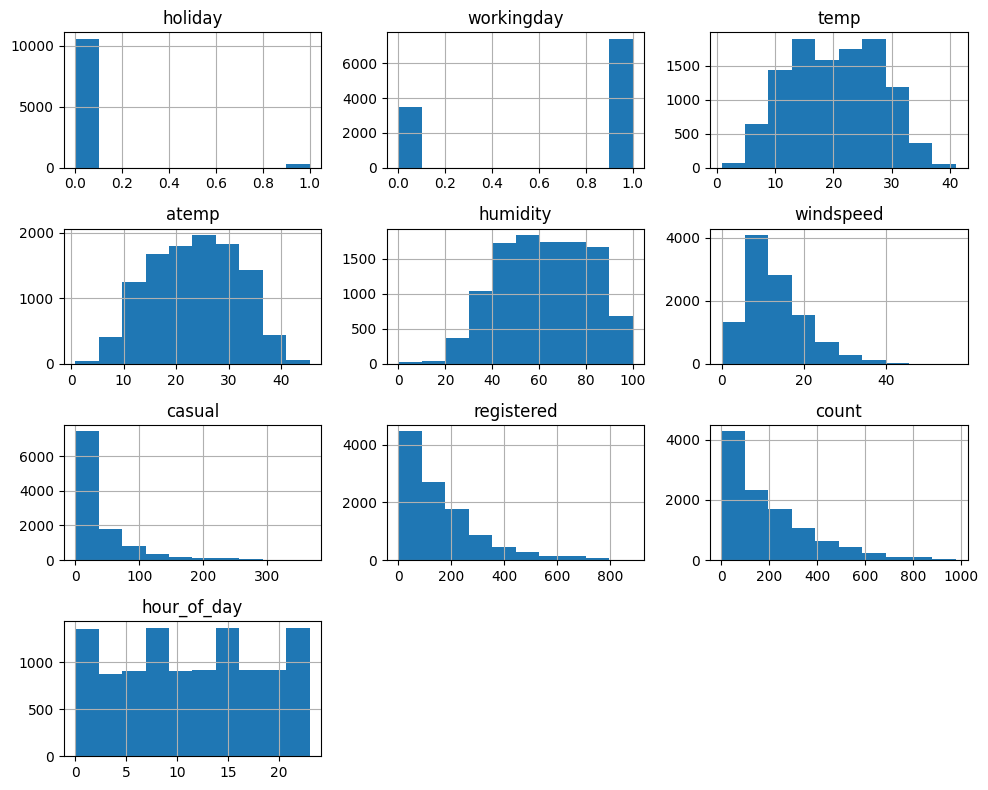

In [ ]:
train.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
predictor_new = TabularPredictor(
    learner_kwargs={"ignored_columns": ["casual", "registered"]},label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=train,
    time_limit=900,
    presets="best_quality",
    verbosity=2
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230610_172637/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20230610_172637/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11843.32 MB
	Train Data (Original)  Memory Usage: 1.46 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

In [ ]:
predictor_new.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.108303      46.377043  838.165766                0.001345           0.491395            3       True         15
1          LightGBM_BAG_L2  -30.393977      42.984712  641.239779                0.560478          38.525683            2       True         11
2          CatBoost_BAG_L2  -30.612760      42.570581  700.996547                0.146347          98.282451            2       True         13
3        LightGBMXT_BAG_L2  -30.946247      44.164260  647.931113                1.740026          45.217017            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.437484      43.414197  615.447228                0.989964          12.733132            2       True         14
5   RandomForestMSE_BAG_L2  -31.593200      43.928847  655.649220         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -

In [ ]:
y_pred=predictor_new.predict(test)
y_pred_2=np.ceil(y_pred).astype(int)
y_pred_2

0        17
1        12
2        11
3        10
4         8
       ... 
6488    299
6489    210
6490    157
6491    111
6492     73
Name: count, Length: 6493, dtype: int64

In [ ]:
submission =pd.concat([test['datetime'],y_pred_2],axis=1)

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
submission_file_path = '/content/submission.csv'

In [ ]:
!kaggle competitions submit -c Bike-Sharing-Demand -f /content/submission.csv -m test_submission_1

100% 149k/149k [00:03<00:00, 42.7kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description        status    publicScore  privateScore  
--------------  -------------------  -----------------  --------  -----------  ------------  
submission.csv  2023-06-10 17:51:20  test_submission_1  complete  0.67102      0.67102       
submission.csv  2023-06-10 17:08:06  test_submission_1  complete  1.79853      1.79853       
submission.csv  2023-06-10 13:25:49  test_submission_1  complete  1.78043      1.78043       
submission.csv  2023-06-10 12:46:14  test_submission_1  complete  0.64989      0.64989       


In [ ]:
import autogluon as ag

In [ ]:
hyperparameters={'RF':{'n_estimators':ag.core.space.Int(100,500),'max_depth':ag.core.space.Int(lower=3, upper=10)},
                 'KNN':{'n_neighbors':ag.core.space.Int(93,15)},
                 'XT':{'n_estimators': ag.core.space.Int(100,500)},
                 'GBM':{'num_boost_round':ag.core.space.Int(100,500),
                        'learning_rate':ag.core.space.Real(lower=0.01,upper=0.1),
                        'max_depth': ag.core.space.Int(lower=3,upper=10)},
                 'CAT':{
                    'iterations': ag.core.space.Int(lower=100,upper=500),
                    'learning_rate':ag.core.space.Real(lower=0.01,upper=0.1),
                    'depth': ag.core.space.Int(lower=3,upper=10)
                 }}
search_strategy='random'

In [ ]:
hyperparameter_tune_kwargs={'num_trials': 5,
                            'scheduler': 'local',
                            'searcher':search_strategy}

predictor_hpo = TabularPredictor(
    learner_kwargs={"ignored_columns": ["casual", "registered"]},label="count", problem_type="regression", eval_metric="r2"
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

In [ ]:
predictor_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.961389       0.005193  307.998951                0.001184           1.066637            3       True         28
1       LightGBM_BAG_L2/T2   0.961078       0.003703  243.614976                0.000177          49.979526            2       True         16
2       CatBoost_BAG_L2/T2   0.958893       0.003691  244.225022                0.000165          50.589572            2       True         22
3   RandomForest_BAG_L2/T3   0.957969       0.003789  228.968724                0.000263          35.333274            2       True         19
4   RandomForest_BAG_L2/T2   0.957751       0.003667  206.363217                0.000141          12.727767            2       True         18
5     ExtraTrees_BAG_L2/T5   0.957716       0.003853  210.381152                

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T2': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T3': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T4': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T5': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T2': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L1/T1': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T2': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T3': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T4': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T5': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L2/T2': 'StackerEnsembleModel_RF',
  'RandomForest

In [ ]:
y_pred=predictor_hpo.predict(test)
y_pred_3=np.ceil(y_pred).astype(int)
y_pred_3

0        16
1         7
2         6
3         6
4         6
       ... 
6488    248
6489    200
6490    172
6491    112
6492     66
Name: count, Length: 6493, dtype: int64

In [ ]:
submission =pd.concat([test['datetime'],y_pred_1],axis=1)

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
submission_file_path = '/content/submission.csv'

In [ ]:
!kaggle competitions submit -c Bike-Sharing-Demand -f /content/submission.csv -m test_submission_1

100% 148k/148k [00:04<00:00, 35.3kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description        status    publicScore  privateScore  
--------------  -------------------  -----------------  --------  -----------  ------------  
submission.csv  2023-06-10 19:10:03  test_submission_1  complete  1.79853      1.79853       
submission.csv  2023-06-10 18:58:32  test_submission_1  complete  1.79853      1.79853       
submission.csv  2023-06-10 17:51:20  test_submission_1  complete  0.67102      0.67102       
submission.csv  2023-06-10 17:08:06  test_submission_1  complete  1.79853      1.79853       


Creating plots and table for report

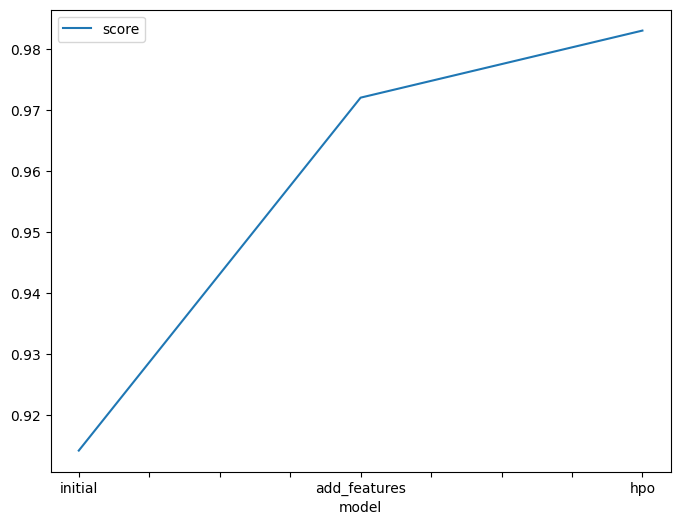

In [ ]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.914135, 0.972012,0.983011 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

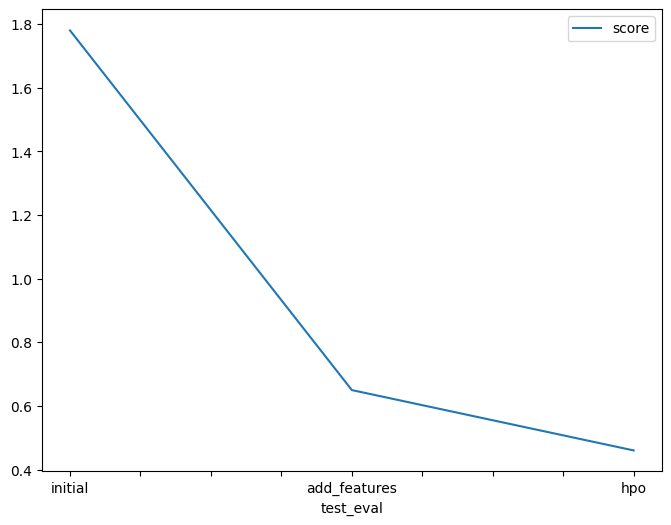

In [ ]:
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78043, .64989, .46017]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

<Axes: xlabel='model'>

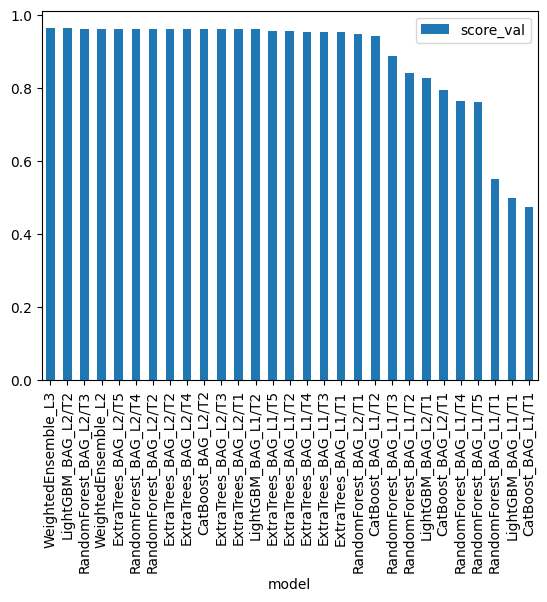

In [ ]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

<Axes: xlabel='model'>

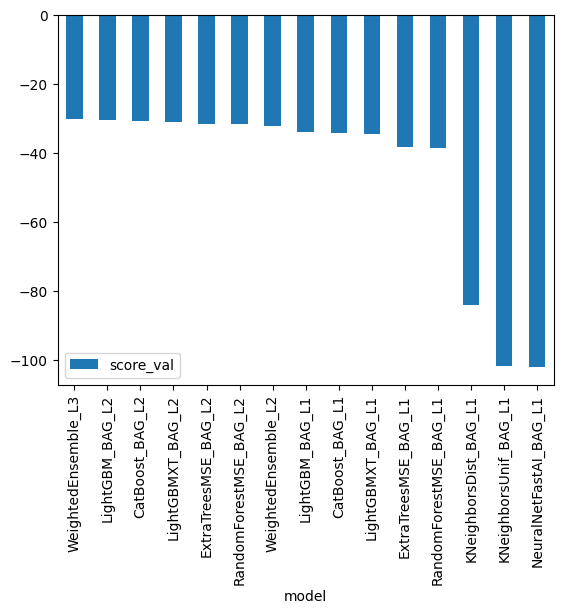

In [ ]:
predictor_new.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

<Axes: xlabel='model'>

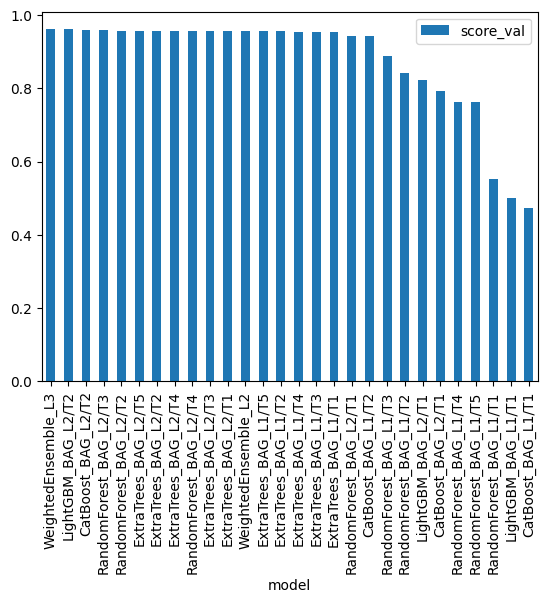

In [ ]:
predictor_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [7]:
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_trials": [None, None, 5],
    "scheduler": [None, None, 'local'],
    "searcher": [None, None, 'Random'],
    "score": [1.78043, .64989, .46017]
})

,model,num_trials,scheduler,searcher,score
0,initial,NaN,None,None,1.78043
1,add_features,NaN,None,None,0.64989
2,hpo,5.0,local,Random,0.46017
